<a href="https://colab.research.google.com/github/GauravDC27/ml_assignments/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

After modifying the species with very small values, just enough to identify the species
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species
0            5.1           3.5            1.4           0.2     0.1
1            4.9           3.0            1.4           0.2     0.1
2            4.7           3.2            1.3           0.2     0.1
3            4.6           3.1            1.5           0.2     0.1
4            5.0           3.6            1.4           0.2     0.1
[[20.03718739 41.5727026 ]
 [ 2.57232679 41.91518092]
 [91.76642661 74.110575  ]]
The cluster nums are :0
We have found the centroids as :[[20.03718739 41.5727026 ]
 [ 2.57232679 41.91518092]
 [91.76642661 74.110575  ]]


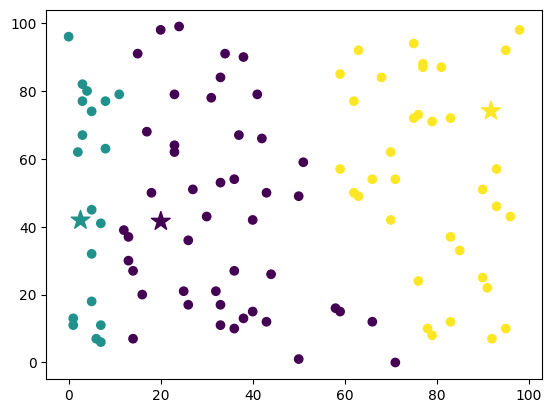

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class KMeansClustering:

  def __init__(self, noOfClusters):
    self.k = noOfClusters
    self.centroids = None

  @staticmethod
  def euclidean_distance(data_point, centroids):
    return np.sqrt(np.sum((centroids - data_point)**2, axis=1))

  def fit(self, X, max_iterations=500):
    self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), size=(self.k,X.shape[1]))
    print(self.centroids)

    for _ in range(max_iterations):
      y=[]

      for data_point in X:
        distances = KMeansClustering.euclidean_distance(data_point, self.centroids)
        cluster_num = np.argmin(distances)
        y.append(cluster_num)

      y = np.array(y)
      print("The cluster nums are :"+str(cluster_num))

      cluster_indices = []

      for i in range(self.k):
        cluster_indices.append(np.argwhere(y == i))

      cluster_centers=[]

      for  i, indices in enumerate(cluster_indices):
        if(len(indices) == 0):
          cluster_centers.append(self.centroids[i])
        else:
          cluster_centers.append(np.mean(X[indices],axis=0)[0])

      if np.max(self.centroids - np.array(cluster_centers) < 0.0001):
        print("We have found the centroids as :"+str(self.centroids))
        break
      else:
        self.centroids = np.array(cluster_centers)

    return y



#Example Usage

url="https://gist.githubusercontent.com/GauravDC27/15d9e30ca16c9ce06b5cfa05124cf4de/raw/21336e71e1f1959c2aba0ee24bdae4ac9e239eb4/ml_iris.csv" # raw-github-link
df=pd.read_csv(url) # converting csv to dataframe
df=df.drop(['Id'], axis=1) # removing the column 'Id'
#print(df.head())
tot_rows=len(df.index) # Counting no. of rows in dataframe
tot_cols=len(df.columns)

df_species = df[df.columns[4]]
#print(df_species)
for count in range(len(df_species)):
  if(df_species[count] == "Iris-setosa"):
    df.at[count,"Species"]="0.1"
  elif(df_species[count] == "Iris-versicolor"):
    df.at[count,"Species"]="0.2"
  elif(df_species[count] == "Iris-virginica"):
    df.at[count,"Species"]="0.3"

print("After modifying the species with very small values, just enough to identify the species")
print(df.head())

#calling K-Means
random_points= np.random.randint(0,100,(100,2))
kmeans = KMeansClustering(noOfClusters=3)
labels = kmeans.fit(random_points)
plt.scatter(random_points[:,0], random_points[:,1], c=labels)
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], c= range(len(kmeans.centroids)), marker="*", s=200)
plt.show()

